In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime

%matplotlib inline
plt.rcParams["figure.figsize"] = (10,5)

In [12]:
# so we see all rows when listing fields
pd.options.display.max_rows = 300

# Load all seven dumps into separate dataframes

For the shot dataframes, clean up the column headers here (the ones in the file have a lot of things like prefixed spaces). Also define the data types up front - including using categorical data where possible - to reduce memory size. In practice this reduced the size for a represenatative year from ~2gb to 500mb, and then to 450mb with minimal uint integer types.

In [13]:
shots_colnames = ['Tour Code', 'Tour Description', 'Year', 'Tourn.#', 'Player #',
                  'Course #', 'Permanent Tournament #', 'Player First Name',
                  'Player Last Name', 'Round', 'Tournament Name', 'Course Name',
                  'Hole', 'Hole Score', 'Par Value', 'Yardage', 'Shot',
                  'Shot Type(S/P/D)', '# of Strokes', 'From Location(Scorer)',
                  'From Location(Enhanced)', 'To Location(Scorer)',
                  'To Location(Enhanced)', 'Distance', 'Distance to Pin',
                  'In the Hole Flag', 'Around the Green Flag', '1st Putt Flag',
                  'Distance to Hole after the Shot', 'Time', 'Lie', 'Elevation',
                  'Slope', 'X Coordinate', 'Y Coordinate', 'Z Coordinate',
                  'Distance from Center', 'Distance from Edge', 'Date', 'Left/Right',
                  'Strokes Gained/Baseline', 'Strokes Gained Category',
                  'Recovery Shot']

In [14]:
shots_dtypes = {"Tour Code":"category",
                "Tour Description":"category",
                "Year": np.uint16,
                "Tourn.#": np.uint16,
                "Player #": np.uint16,
                "Course #": np.uint16,
                "Permanent Tournament #": np.uint16,
                "Player First Name":"category",
                "Player Last Name":"category",
                "Round": np.uint8,
                "Tournament Name":"category",
                "Course Name":"category",
                "Hole": np.uint8,
                "Hole Score": np.float32,
                "Par Value": np.uint8,
                "Yardage": np.uint16,
                "Shot": np.uint8,
                "Shot Type(S/P/D)":"category",
                "# of Strokes": np.uint8,
                "From Location(Scorer)":"category",
                "From Location(Enhanced)": object,
                "To Location(Scorer)":"category",
                "To Location(Enhanced)":"category",
                "Distance": np.uint16,
                "Distance to Pin": np.uint16,
                "In the Hole Flag":"category",
                "Around the Green Flag":"category",
                "1st Putt Flag":"category",
                "Distance to Hole after the Shot": np.uint16,
                "Time": np.uint16,
                "Lie":"category",
                "Elevation":"category",
                "Slope":"category",
                "X Coordinate": object,
                "Y Coordinate": object,
                "Z Coordinate": object,
                "Distance from Center": np.uint16,
                "Distance from Edge": np.uint16,
                #"Date":datetime, use parse_dates on load
                "Left/Right":"category",
                "Strokes Gained/Baseline": np.float32,
                "Strokes Gained Category":"category",
                "Recovery Shot":"category"
}

In [15]:
def get_shotlink_df(filename, path='../../../golf_course_project_data/', **kwargs):
    full_path = f'{path}{filename}'
    print(full_path)
    return pd.read_csv(full_path, sep=';', encoding='ISO-8859-1', **kwargs)

def get_shotlink_shots_df(filename, path='../../../golf_course_project_data/'):
    return get_shotlink_df(filename, path, 
                           header=0, names=shots_colnames, 
                           dtype=shots_dtypes, 
                           na_values='  ')  # 'Hole Score has double spaced empty values

In [16]:
shot_filenames = [f'Shot{year}.TXT' for year in range(2008,2018)]
other_filenames = ['Hole2017.TXT','Round2017.TXT','Event2017.TXT','CourseLevel2017.TXT',
                   'RadarLaunch2017.TXT','RadarTrajectory2017.TXT']

In [17]:
other_dfs = [get_shotlink_df(filename) for filename in other_filenames]
holes, rounds, events, course_levels, radar_launches, radar_trajectories = other_dfs

../../../golf_course_project_data/Hole2017.TXT
../../../golf_course_project_data/Round2017.TXT


/Users/andrewenfield/miniconda3/envs/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2910: DtypeWarning: Columns (22,85) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


../../../golf_course_project_data/Event2017.TXT


/Users/andrewenfield/miniconda3/envs/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2910: DtypeWarning: Columns (105) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


../../../golf_course_project_data/CourseLevel2017.TXT
../../../golf_course_project_data/RadarLaunch2017.TXT
../../../golf_course_project_data/RadarTrajectory2017.TXT


In [18]:
type(other_dfs[0].columns.values)

numpy.ndarray

In [19]:
shot_dfs = [get_shotlink_shots_df(filename) for filename in shot_filenames]

../../../golf_course_project_data/Shot2008.TXT
../../../golf_course_project_data/Shot2009.TXT
../../../golf_course_project_data/Shot2010.TXT
../../../golf_course_project_data/Shot2011.TXT
../../../golf_course_project_data/Shot2012.TXT
../../../golf_course_project_data/Shot2013.TXT
../../../golf_course_project_data/Shot2014.TXT
../../../golf_course_project_data/Shot2015.TXT
../../../golf_course_project_data/Shot2016.TXT
../../../golf_course_project_data/Shot2017.TXT


In [20]:
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # we assume if not a df it's a series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # convert bytes to megabytes
    return "{:03.2f} MB".format(usage_mb)

In [21]:
[(len(df), mem_usage(df)) for df in shot_dfs + other_dfs]

[(1206071, '447.05 MB'),
 (1137348, '420.61 MB'),
 (1160416, '429.29 MB'),
 (1125170, '416.18 MB'),
 (1102847, '408.02 MB'),
 (995304, '368.30 MB'),
 (1106109, '408.82 MB'),
 (1176101, '434.25 MB'),
 (1141966, '421.70 MB'),
 (1214437, '448.78 MB'),
 (338992, '422.68 MB'),
 (18868, '47.91 MB'),
 (6033, '15.52 MB'),
 (3438, '3.24 MB'),
 (12969, '16.56 MB'),
 (514487, '736.92 MB')]

In [22]:
# # quickie to see if cols can be smaller than int32
# foo_df = shot_dfs[9]
# for colname in foo_df.columns:
#     if str(foo_df[colname].dtype) == 'int32':
#         print(f'{colname} - {pd.to_numeric(shot_dfs[9][colname], downcast="unsigned").dtype}')

# Shots

In [23]:
shots = shot_dfs[9]  # the last one is 2017

In [24]:
shots.shape

(1214437, 43)

In [25]:
shots[:3]

,Tour Code,Tour Description,Year,Tourn.#,Player #,Course #,Permanent Tournament #,Player First Name,Player Last Name,Round,...,X Coordinate,Y Coordinate,Z Coordinate,Distance from Center,Distance from Edge,Date,Left/Right,Strokes Gained/Baseline,Strokes Gained Category,Recovery Shot
0,R,PGA TOUR,2017,10,1810,552,464,Phil,Mickelson,1,...,"10,734.3430","9,531.0870",84.1040,1104,645,10/13/2016,R,-0.091,Off the Tee,No
1,R,PGA TOUR,2017,10,1810,552,464,Phil,Mickelson,1,...,"10,839.1510","9,933.2770",90.4280,245,159,10/13/2016,R,0.076,Approach the Green,No
2,R,PGA TOUR,2017,10,1810,552,464,Phil,Mickelson,1,...,"10,836.8030","9,974.9770",91.1650,12,483,10/13/2016,L,0.070,Putting,No


In [26]:
shots.iloc[0]

Tour Code                                                       R
Tour Description                                         PGA TOUR
Year                                                         2017
Tourn.#                                                        10
Player #                                                     1810
Course #                                                      552
Permanent Tournament #                                        464
Player First Name                                            Phil
Player Last Name                                        Mickelson
Round                                                           1
Tournament Name                                      Safeway Open
Course Name                        Silverado Resort and Spa North
Hole                                                            1
Hole Score                                                      5
Par Value                                                       4
Yardage   

In [100]:
def get_float_coord_series(not_float_coord_series):
    return not_float_coord_series.str.replace(',','').str.replace(r'(\d+.\d+)-', r'-\1').astype(np.float32)

In [97]:
coord_colnames = ['X Coordinate','Y Coordinate','Z Coordinate']
for colname in coord_colnames:
    shots[colname] = get_float_coord_series(shots[colname])

In [98]:
shots.dtypes

Tour Code                          category
Tour Description                   category
Year                                 uint16
Tourn.#                              uint16
Player #                             uint16
Course #                             uint16
Permanent Tournament #               uint16
Player First Name                  category
Player Last Name                   category
Round                                 uint8
Tournament Name                    category
Course Name                        category
Hole                                  uint8
Hole Score                          float32
Par Value                             uint8
Yardage                              uint16
Shot                                  uint8
Shot Type(S/P/D)                   category
# of Strokes                          uint8
From Location(Scorer)              category
From Location(Enhanced)              object
To Location(Scorer)                category
To Location(Enhanced)           

In [99]:
sum(shots['X Coordinate'] < 0), sum(shots['Y Coordinate'] < 0), sum(shots['Z Coordinate'] < 0)

(24698, 0, 21140)

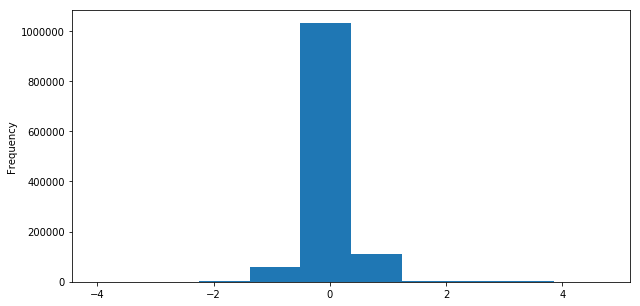

In [107]:
shots['Strokes Gained/Baseline'].plot.hist()

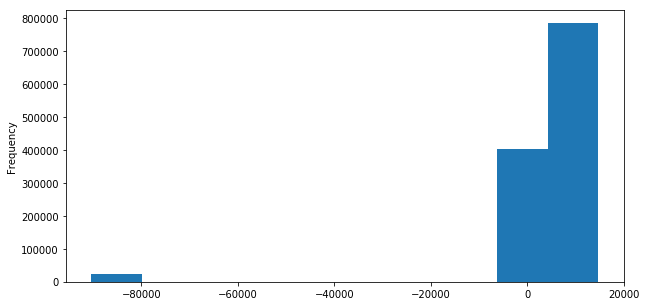

In [108]:
shots['X Coordinate'].plot.hist()

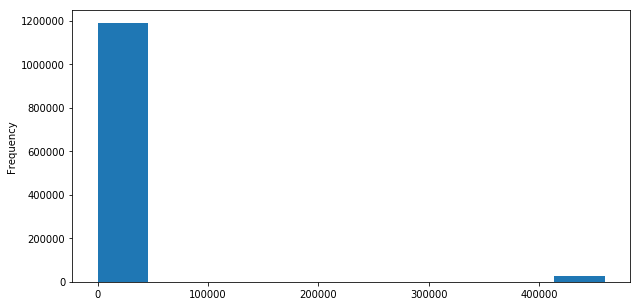

In [109]:
shots['Y Coordinate'].plot.hist()

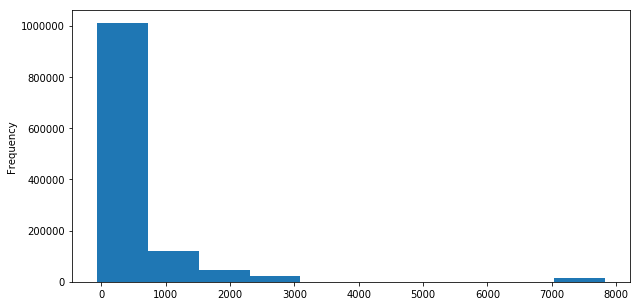

In [110]:
shots['Z Coordinate'].plot.hist()

In [113]:
shots[shots['Strokes Gained/Baseline'] > 4].iloc[0]

Tour Code                                                      R
Tour Description                                        PGA TOUR
Year                                                        2017
Tourn.#                                                      280
Player #                                                   34466
Course #                                                     714
Permanent Tournament #                                        18
Player First Name                                          Peter
Player Last Name                                         Malnati
Round                                                          2
Tournament Name                    Zurich Classic of New Orleans
Course Name                                        TPC Louisiana
Hole                                                          18
Hole Score                                                   nan
Par Value                                                      5
Yardage                  

# Holes

In [12]:
holes.shape

(338992, 56)

In [13]:
holes[:3]

,Tour,Tournament Year,Tournament Schedule #,Permanent #,Player #,Course #,Player Name,Hole #,Round #,Final Round,...,Scrambling Shot dist from Hole,Scrambling Shot Prox to Hole,Time Hole Finished,Putts Gained,SG T2G,SG Total,OTT Strokes Gained,APP Strokes Gained,ARG Strokes Gained,Unnamed: 55
0,PGA TOUR,2017,10,464,1810,552,"Mickelson, Phil",1,1,0,...,0,0,12:52,-0.914,-0.064,-0.979,-0.097,0.076,0.00,NaN
1,PGA TOUR,2017,10,464,1810,552,"Mickelson, Phil",2,1,0,...,377,100,13:03,-0.477,-0.376,-0.854,0.000,-0.203,-0.22,NaN
2,PGA TOUR,2017,10,464,1810,552,"Mickelson, Phil",3,1,0,...,0,0,13:21,0.555,0.534,1.090,-0.061,0.555,0.00,NaN


In [14]:
holes.iloc[0]

Tour                                                      PGA TOUR
Tournament Year                                               2017
Tournament Schedule #                                           10
Permanent #                                                    464
Player #                                                      1810
Course #                                                       552
Player Name                                        Mickelson, Phil
Hole #                                                           1
Round #                                                          1
Final Round                                                      0
Event Name                                            Safeway Open
Course Name                         Silverado Resort and Spa North
Par                                                              4
Scorecard Yard                                                 436
Actual Yard                                                   

# Rounds

In [15]:
rounds.shape

(18868, 179)

In [16]:
rounds[:3]

,Tour,Tournament Year,Tournament #,Permanent Tournament #,Course #,Team ID,Team Number,Player Number,Player Name,Round Number,...,Putting > 10' (putts made),Putting > 10' (attempts),Putting > 10' (rank),Total Putts Gained,Total SG T2G,Total SG Total,OTT SG Avg.,APP SG Avg.,ARG SG Avg.,Unnamed: 178
0,R,2017,10,464,552,,0,1810,"Mickelson, Phil",1,...,1.0,9.0,93.0,.510-,2.573,2.063,.368-,2.150,.790,NaN
1,R,2017,10,464,552,,0,2206,"Toms, David",1,...,3.0,11.0,24.0,1.945,4.884-,2.938-,.325-,3.588-,.969-,NaN
2,R,2017,10,464,552,,0,12510,"Campbell, Chad",1,...,NaN,8.0,127.0,1.357-,2.420,1.063,.432-,1.957,.894,NaN


In [17]:
rounds.iloc[0]

Tour                                                                                R
Tournament Year                                                                  2017
Tournament #                                                                       10
Permanent Tournament #                                                            464
Course #                                                                          552
Team ID                                                                              
Team Number                                                                         0
Player Number                                                                    1810
Player Name                                                           Mickelson, Phil
Round Number                                                                        1
Event Name                                                               Safeway Open
Course Name                                           

# Events

In [18]:
events.shape

(6033, 201)

In [19]:
events[:3]

,Tour,Tournament Year,Tournament Number,Permanent Tournament Number,Team ID,Team Number,Player Number,Player Name,"Player Age (years, months,days)",Event Name,...,SG: T2G Rank,TTL SG Total,SG: Total Rank,OTT SG Avg.,OTT SG Rank,APP SG Avg.,APP SG Rank,ARG SG Avg.,ARG SG Rank,Unnamed: 200
0,R,2017,10,464,NaN,0,20771,"Alker, Steven",45 02 18,Safeway Open,...,12.0,3.745,26.0,0.073,37.0,-0.032,50.0,1.478,1.0,NaN
1,R,2017,10,464,NaN,0,33120,"Anderson, Mark",30 08 02,Safeway Open,...,999.0,3.813-,999.0,-0.347,999.0,-2.526,999.0,0.626,999.0,NaN
2,R,2017,10,464,NaN,0,19803,"Armour, Ryan",40 07 19,Safeway Open,...,999.0,2.813-,999.0,-0.817,999.0,-1.410,999.0,-0.716,999.0,NaN


In [20]:
events.iloc[0]

Tour                                                                   R
Tournament Year                                                     2017
Tournament Number                                                     10
Permanent Tournament Number                                          464
Team ID                                                              NaN
 Team Number                                                           0
 Player Number                                                     20771
Player Name                                                Alker, Steven
 Player Age (years, months,days)                                45 02 18
Event Name                                                  Safeway Open
Official Event(Y/N)                                                   Y 
FedExCup Points                                                       28
Money                                                          40,833.33
Finish Position(numeric)                           

# Course levels

In [21]:
course_levels.shape

(3438, 34)

In [22]:
course_levels[:3]

,Year,Course #,Course Name,Round,Hole,Fwy Width 250,Actual 250 Distance,Fwy Width 275,Actual 275 Distance,Fwy Width 300,...,PM Wind Dir,Scorecard Ydg,Actual Ydg,Par,Green Grass,Fwy. Grass,Tee Grass,Bunker Grass,Rough Grass,Unnamed: 33
0,2017,4,Torrey Pines GC (South),1,1,24,26,25,29,25,...,RL,450,437.0,4,Bermuda/Rye/Kikuya/Poa an,Meyer Zoysiagrass,Common 419 Bermudagrass,Unknown,Crenshaw Bentgrass,NaN
1,2017,4,Torrey Pines GC (South),1,2,29,25,28,27,28,...,RL,389,378.0,4,Bermuda/Rye/Kikuya/Poa an,Meyer Zoysiagrass,Common 419 Bermudagrass,Unknown,Crenshaw Bentgrass,NaN
2,2017,4,Torrey Pines GC (South),1,3,0,0,0,0,0,...,RL,200,201.0,3,Bermuda/Rye/Kikuya/Poa an,Meyer Zoysiagrass,Common 419 Bermudagrass,Unknown,Crenshaw Bentgrass,NaN


In [23]:
course_levels.iloc[0]

Year                                        2017
Course #                                       4
Course Name              Torrey Pines GC (South)
Round                                          1
Hole                                           1
Fwy Width 250                                 24
Actual 250 Distance                           26
Fwy Width 275                                 25
Actual 275 Distance                           29
Fwy Width 300                                 25
Actual 300 Distance                           31
Fwy Width 325                                 25
Actual 325 Distance                           34
Fwy Width 350                                 24
Actual 350 Distance                           36
Fwy Firmness                                Soft
Grn Firmness                                Soft
Grn Height                                   0.9
Rough Height                                   4
Fwy Height                                  0.44
Stimp               

In [24]:
sorted(course_levels['Course Name'].unique())

['Albany',
 'Austin Country Club',
 'Bay Hill Club & Lodge',
 'CC of Jackson',
 'Club de Golf Chapultepec',
 'Coco Beach Golf & CC',
 'Colonial CC',
 'Conway Farms GC',
 'Eagle Point Golf Club',
 'East Lake GC',
 'El Camaleon GC',
 'Erin Hills',
 'Firestone CC (South)',
 'GC of Houston',
 'Glen Abbey GC',
 'Glen Oaks Club',
 'Harbour Town GL',
 'Innisbrook Resort (Copperhead)',
 'Kingston Heath Golf Club',
 'Montreux G&CC',
 'Muirfield Village GC',
 'PGA National (Champion)',
 'Pebble Beach GL',
 'Plantation Course at Kapalua',
 'Quail Hollow-PGA Championship',
 'RTJ Trail (Grand National)',
 'Riviera CC',
 'Sea Island Resort (Seaside)',
 'Sedgefield CC',
 'Sheshan International GC',
 'Silverado Resort and Spa North',
 'Stadium Course',
 'TPC Boston',
 'TPC Deere Run',
 'TPC Four Seasons Resort',
 'TPC Kuala Lumpur',
 'TPC Louisiana',
 'TPC Potomac at Avenel Farm',
 'TPC River Highlands',
 'TPC San Antonio - AT&T Oaks',
 'TPC Sawgrass',
 'TPC Scottsdale',
 'TPC Southwind',
 'TPC Summer

# Radar launches

In [25]:
radar_launches.shape

(12969, 51)

In [26]:
radar_launches[:3]

,Tour,Tour Description,Year,Tournament Sequence Number,Tournament Permanent Number,Tournament Name,Player Number,Player First Name,Player Last Name,Round,...,Course Number,Course Name,Valid Calculated Drive,Valid Stored Drive,Club,Total Distance,Ending Location Code,Ending Location Description,Weather,Unnamed: 50
0,R,PGA TOUR,2017,10,464,Safeway Open,1810,Phil,Mickelson,1,...,552,Silverado Resort and Spa North,Y,Y,CDR,11838,OFW,Fairway,5-10,NaN
1,R,PGA TOUR,2017,10,464,Safeway Open,1810,Phil,Mickelson,2,...,552,Silverado Resort and Spa North,Y,Y,CDR,10646,ORO,Primary Rough,Lt,NaN
2,R,PGA TOUR,2017,10,464,Safeway Open,1810,Phil,Mickelson,3,...,552,Silverado Resort and Spa North,Y,Y,CDR,11225,ORO,Primary Rough,8-15,NaN


In [27]:
radar_launches.iloc[0]

Tour                                                        R
Tour Description                                     PGA TOUR
Year                                                     2017
Tournament Sequence Number                                 10
Tournament Permanent Number                               464
Tournament Name                                  Safeway Open
Player Number                                            1810
Player First Name                                        Phil
Player Last Name                                    Mickelson
Round                                                       1
Hole Number                                                 5
Hole Sequence Number                                        5
Shot Sequence Number                                        1
Club Head Speed                                       121.568
Ball Speed                                            170.425
Smash Factor                                            1.401
Vertical

# Radar trajectories

In [28]:
radar_trajectories.shape

(514487, 57)

In [29]:
radar_trajectories[:3]

,Tour,Tour Description,Year,Tournament Sequence Number,Tournament Permanent Number,Tournament Name,Player Number,Player First Name,Player Last Name,Round,...,Ending Location Code,Ending Location Description,Weather,Trajectory Sequence,Trajectory X Coordinate,Trajectory Y Coordinate,Trajectory Z Coordinate,Trajectory Time,Extrapolated,Unnamed: 56
0,R,PGA TOUR,2017,10,464,Safeway Open,1810,Phil,Mickelson,1,...,OFW,Fairway,5-10,1,9974.563,12963.628,135.455,13:39:07,N,NaN
1,R,PGA TOUR,2017,10,464,Safeway Open,1810,Phil,Mickelson,1,...,OFW,Fairway,5-10,2,10017.888,12947.290,148.746,13:39:07,N,NaN
2,R,PGA TOUR,2017,10,464,Safeway Open,1810,Phil,Mickelson,1,...,OFW,Fairway,5-10,3,10058.331,12931.773,161.526,13:39:07,N,NaN


In [30]:
radar_trajectories.iloc[0]

Tour                                                        R
Tour Description                                     PGA TOUR
Year                                                     2017
Tournament Sequence Number                                 10
Tournament Permanent Number                               464
Tournament Name                                  Safeway Open
Player Number                                            1810
Player First Name                                        Phil
Player Last Name                                    Mickelson
Round                                                       1
Hole Number                                                 5
Hole Sequence Number                                        5
Shot Sequence Number                                        1
Club Head Speed                                       121.568
Ball Speed                                            170.425
Smash Factor                                            1.401
Vertical